In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break
    break

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Pneumonia Detection using CNN
This notebook contains the model preparation where the X-Rays are given and we need to classify whether the person's health is Normal or they are suffering from Pneumonia.

# Read the files
Three different folders are given for Training, Testing and Validation. A dataframe is created which contains the filepath for image and the condition i.e. Normal or Pneumonia.

In [90]:
def create_dataframe(folder_path, label, result):
    filenames = os.listdir(folder_path)
    full_paths = [os.path.join(folder_path, filename) for filename in filenames]
    dataframe = pd.DataFrame({
    "Filename": full_paths,
    "Label": label,
    "Chest X-Ray": result
    })
    return dataframe

# creating dataframe for training and testing data
folder_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/'

train_normal_path = folder_path+'train/NORMAL/'
df_train = create_dataframe(train_normal_path, 'train', 'Normal')

train_pneumonia_path = folder_path+'train/PNEUMONIA'
df_train = pd.concat([df_train, create_dataframe(train_pneumonia_path, 'train', 'Pneumonia')])
df_train

,Filename,Label,Chest X-Ray
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,train,Normal
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,train,Normal
2,/kaggle/input/chest-xray-pneumonia/chest_xray/...,train,Normal
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,train,Normal
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,train,Normal
...,...,...,...
3870,/kaggle/input/chest-xray-pneumonia/chest_xray/...,train,Pneumonia
3871,/kaggle/input/chest-xray-pneumonia/chest_xray/...,train,Pneumonia
3872,/kaggle/input/chest-xray-pneumonia/chest_xray/...,train,Pneumonia
3873,/kaggle/input/chest-xray-pneumonia/chest_xray/...,train,Pneumonia


In [91]:
test_normal_path = folder_path+'test/NORMAL/'
df_test = create_dataframe(test_normal_path, 'test', 'Normal')

test_pneumonia_path = folder_path+'test/PNEUMONIA'
df_test = pd.concat([df_test, create_dataframe(test_pneumonia_path, 'test', 'Pneumonia')])
df_test

,Filename,Label,Chest X-Ray
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,test,Normal
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,test,Normal
2,/kaggle/input/chest-xray-pneumonia/chest_xray/...,test,Normal
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,test,Normal
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,test,Normal
...,...,...,...
385,/kaggle/input/chest-xray-pneumonia/chest_xray/...,test,Pneumonia
386,/kaggle/input/chest-xray-pneumonia/chest_xray/...,test,Pneumonia
387,/kaggle/input/chest-xray-pneumonia/chest_xray/...,test,Pneumonia
388,/kaggle/input/chest-xray-pneumonia/chest_xray/...,test,Pneumonia


In [92]:
val_normal_path = folder_path+'val/NORMAL/'
df_val = create_dataframe(val_normal_path, 'val', 'Normal')

val_pneumonia_path = folder_path+'val/PNEUMONIA'
df_val = pd.concat([df_val, create_dataframe(val_pneumonia_path, 'val', 'Pneumonia')])
df_val

,Filename,Label,Chest X-Ray
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Normal
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Normal
2,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Normal
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Normal
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Normal
5,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Normal
6,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Normal
7,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Normal
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Pneumonia
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Pneumonia


# Visualizing the X-Ray data given for Normal and Pneumonia Case
We are using cv2 for visualizing the image. It can be observed the X-Ray for Pneumonia has more white-gray content which is actually towards the right of the histogram.

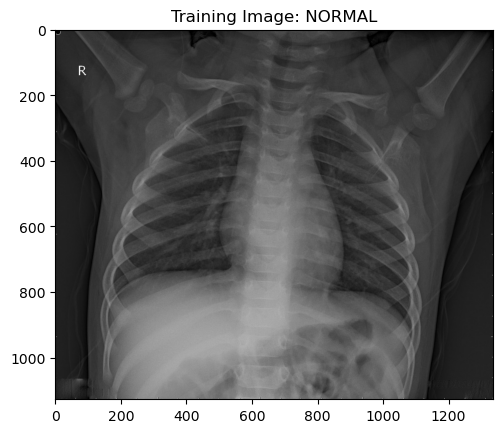

In [93]:
import matplotlib.pyplot as plt
import cv2 
train_normal_img = df_train['Filename']
plt.imshow(cv2.imread(train_normal_img.tolist()[0]))
plt.title('Training Image: NORMAL')
plt.show()

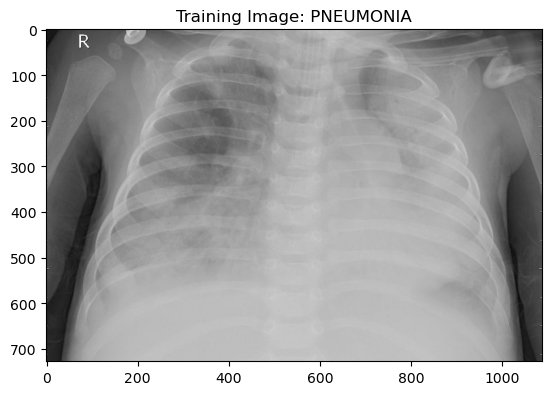

In [94]:
plt.imshow(cv2.imread(train_normal_img.tolist()[-1]))
plt.title('Training Image: PNEUMONIA')
plt.show()

# Checking the Histogram
The histogram of NORMAL case shows that the frequency of black content is more and the pixel values are concentrated to that region. Whereas in PNEUMONIA case, the histogram is somewhat distributed and is towards #ffffff area.

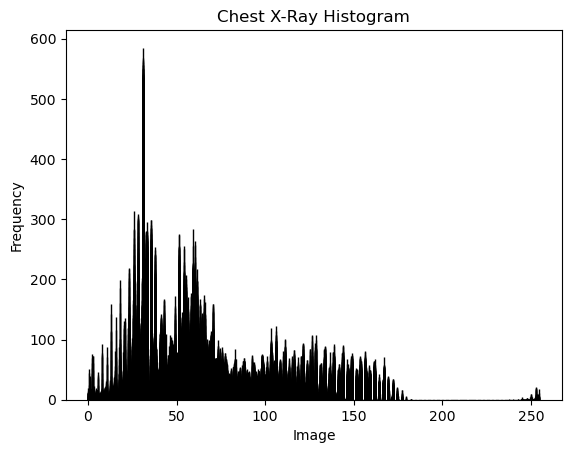

In [95]:
import cv2

normal_img = cv2.imread(df_train.iloc[0,0])
normal_img = cv2.cvtColor(normal_img, cv2.COLOR_BGR2GRAY)
pneumonia_img = cv2.imread(df_train.iloc[-1,0])
pneumonia_img = cv2.cvtColor(pneumonia_img, cv2.COLOR_BGR2GRAY)

plt.hist(normal_img, bins=100, edgecolor='black')
#plt.hist(pneumonia_img)
plt.xlabel('Image')
plt.ylabel('Frequency')
plt.title('Chest X-Ray Histogram')
plt.show()

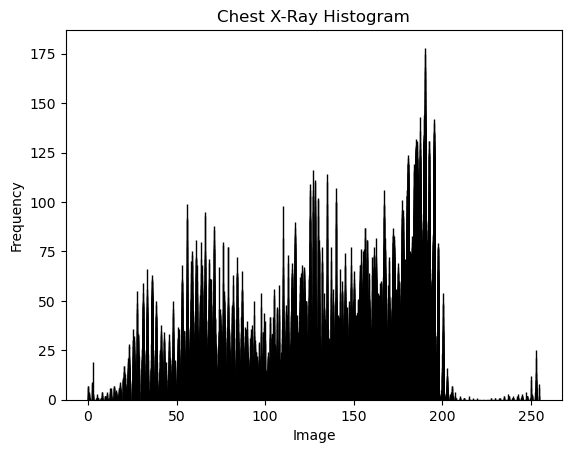

In [96]:
plt.hist(pneumonia_img, bins=100, edgecolor='black')
plt.xlabel('Image')
plt.ylabel('Frequency')
plt.title('Chest X-Ray Histogram')
plt.show()

# Labelling the output

In [97]:
from sklearn.model_selection import train_test_split

df = pd.concat([df_train, df_test, df_val])
df['result'] = (df['Chest X-Ray'] == 'Pneumonia')
df

,Filename,Label,Chest X-Ray,result
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,train,Normal,False
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,train,Normal,False
2,/kaggle/input/chest-xray-pneumonia/chest_xray/...,train,Normal,False
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,train,Normal,False
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,train,Normal,False
...,...,...,...,...
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Pneumonia,True
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Pneumonia,True
5,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Pneumonia,True
6,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Pneumonia,True


In [98]:
df['result'].replace(True, 1, inplace=True)
df['result'].replace(False, 0, inplace=True)
df

,Filename,Label,Chest X-Ray,result
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,train,Normal,0
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,train,Normal,0
2,/kaggle/input/chest-xray-pneumonia/chest_xray/...,train,Normal,0
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,train,Normal,0
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,train,Normal,0
...,...,...,...,...
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Pneumonia,1
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Pneumonia,1
5,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Pneumonia,1
6,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Pneumonia,1


In [99]:
l1, l2, l3 = len(df_train), len(df_train)+len(df_test), len(df_train)+len(df_test)+len(df_val)
train, test, val = df.iloc[:l1, :], df.iloc[l1:l2, :], df.iloc[l2:,:]
val

,Filename,Label,Chest X-Ray,result
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Normal,0
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Normal,0
2,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Normal,0
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Normal,0
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Normal,0
5,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Normal,0
6,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Normal,0
7,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Normal,0
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Pneumonia,1
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,val,Pneumonia,1


In [100]:
IMG_HEIGHT, IMG_WIDTH = 128, 128

# Defining the model
The Convolutional Neural Network model is considered. 

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

def CNN_Model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)))
    model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))
    
    model.add(Conv2D(64, (3, 3), padding='valid', activation='relu'))
    model.add(MaxPooling2D((2, 2), padding='valid'))
    
    model.add(Conv2D(128, (3, 3), padding='valid', activation='relu'))
    model.add(Dropout(0.15))
    model.add(MaxPooling2D((2, 2), padding='valid'))
    
    model.add(Conv2D(128, (3, 3), padding='valid', activation='relu'))
    model.add(MaxPooling2D((2, 2), padding='valid'))
    
    model.add(Conv2D(256, (3, 3), padding='valid', activation='relu'))
    model.add(Dropout(0.15))
    model.add(MaxPooling2D((2, 2), padding='valid'))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [102]:
from tensorflow.keras.optimizers import Adam
model = CNN_Model()
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [103]:
from PIL import Image
data_xx = df_train['Filename'].iloc[:].to_numpy()
images = []
for i in range(len(df_train)):
    image = cv2.cvtColor(cv2.imread(data_xx[i]), cv2.COLOR_BGR2GRAY)
    img = np.array(image)
    img = (cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT)))/255.
    images.append(img)

In [104]:
data_yy = df['result'].iloc[:l1]
result = np.array(data_yy)

In [105]:
images = np.array(images)
images_train, images_test, result_train, result_test  = train_test_split(images, result,test_size=0.15)

In [106]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 dropout_2 (Dropout)         (None, 28, 28, 128)      

# Model Training

In [107]:
history = model.fit(images_train,result_train, validation_data=(images_test,result_test), epochs=10)
model.save('/kaggle/working/model.h5')

#model = tensorflow.keras.models.load_model('model.h5')

Epoch 1/10
139/139 [==============================] - 69s 484ms/step - loss: 0.4293 - accuracy: 0.8026 - val_loss: 0.2636 - val_accuracy: 0.8927
Epoch 2/10
139/139 [==============================] - 66s 476ms/step - loss: 0.1757 - accuracy: 0.9328 - val_loss: 0.1103 - val_accuracy: 0.9579
Epoch 3/10
139/139 [==============================] - 72s 518ms/step - loss: 0.1173 - accuracy: 0.9576 - val_loss: 0.1431 - val_accuracy: 0.9451
Epoch 4/10
139/139 [==============================] - 74s 531ms/step - loss: 0.0941 - accuracy: 0.9673 - val_loss: 0.0736 - val_accuracy: 0.9808
Epoch 5/10
139/139 [==============================] - 76s 545ms/step - loss: 0.0730 - accuracy: 0.9732 - val_loss: 0.0885 - val_accuracy: 0.9668
Epoch 6/10
139/139 [==============================] - 73s 526ms/step - loss: 0.0684 - accuracy: 0.9734 - val_loss: 0.0603 - val_accuracy: 0.9783
Epoch 7/10
139/139 [==============================] - 72s 518ms/step - loss: 0.0569 - accuracy: 0.9795 - val_loss: 0.0536 - val_ac

# Testing against Testing dataset

In [108]:
data = df_test['Filename'].iloc[:].to_numpy()

test_images = []
for i in range(len(df_test)):
    image = cv2.cvtColor(cv2.imread(data[i]), cv2.COLOR_BGR2GRAY)
    img = np.array(image)
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))/255
    test_images.append(img)

test_images = np.array(test_images)
final_test_result = model.predict(test_images)

20/20 [==============================] - 3s 124ms/step


In [109]:
data_y = df['result'].iloc[l1:l2]
test_result = np.array(data_y)
final_test = (final_test_result>0.5).astype(int)
from sklearn.metrics import accuracy_score
accuracy_score(test_result, final_test)

0.8012820512820513

# Testing against Validation dataset

In [110]:
datav = df_val['Filename'].iloc[:].to_numpy()

val_images = []
for i in range(len(df_val)):
    image = cv2.cvtColor(cv2.imread(datav[i]), cv2.COLOR_BGR2GRAY)
    img = np.array(image)
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))/255
    val_images.append(img)

val_images = np.array(val_images)
final_val_result = model.predict(val_images)

1/1 [==============================] - 0s 72ms/step


In [111]:
data_ = df['result'].iloc[l2:]
val_result = np.array(data_)
final_val = (final_val_result>0.5).astype(int)
from sklearn.metrics import accuracy_score
accuracy_score(val_result, final_val)

0.9375

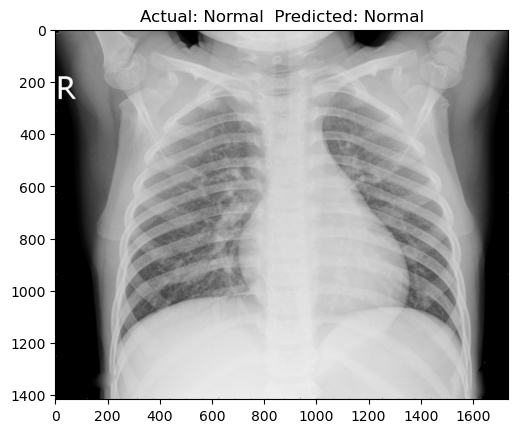

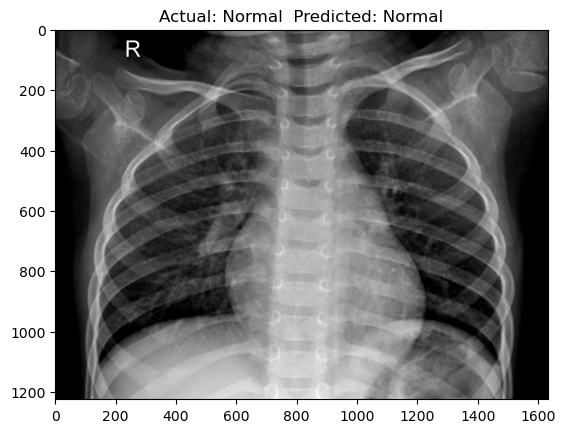

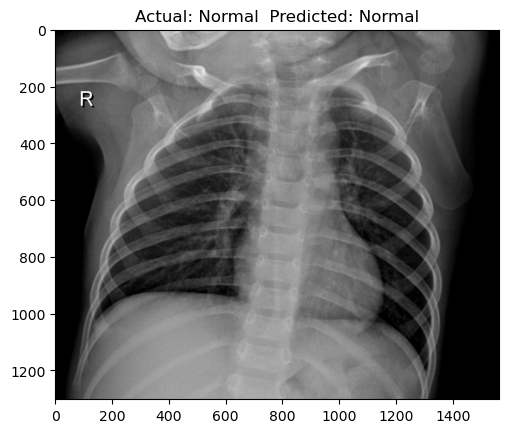

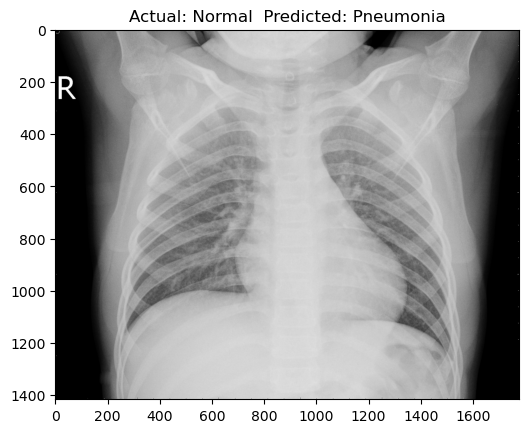

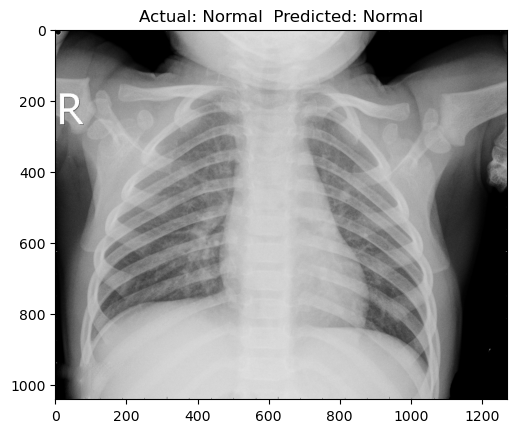

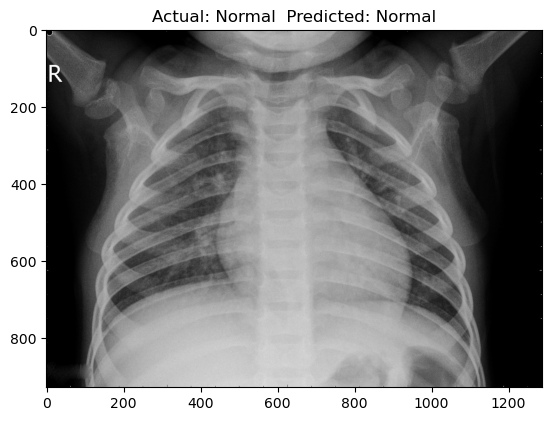

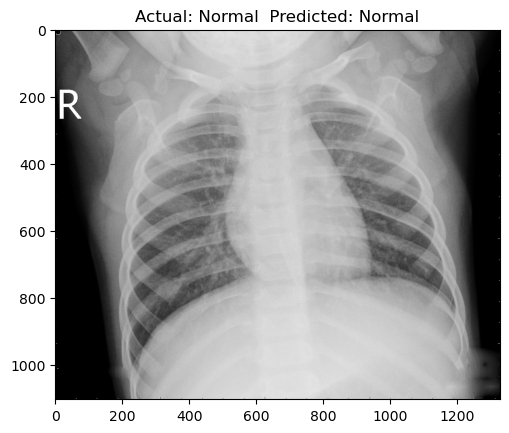

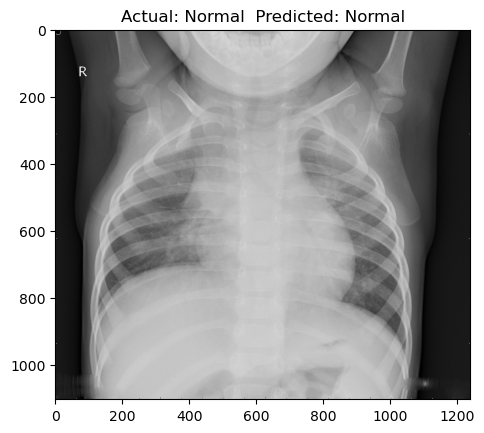

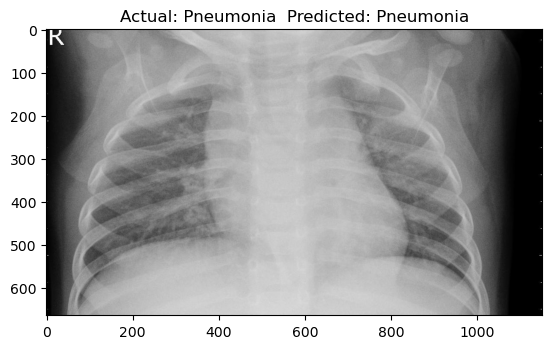

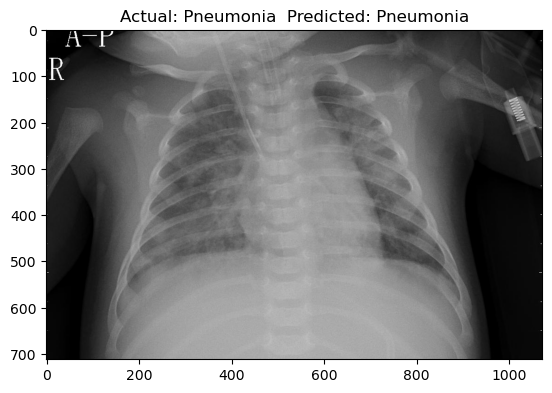

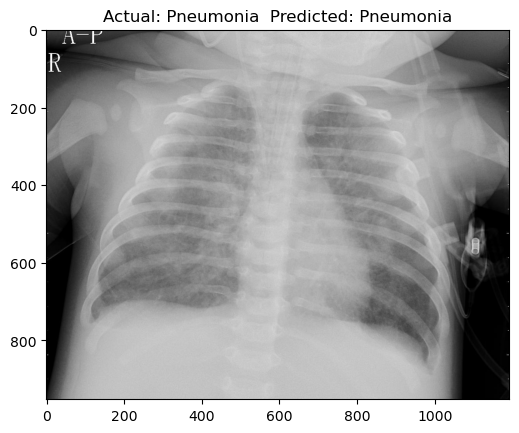

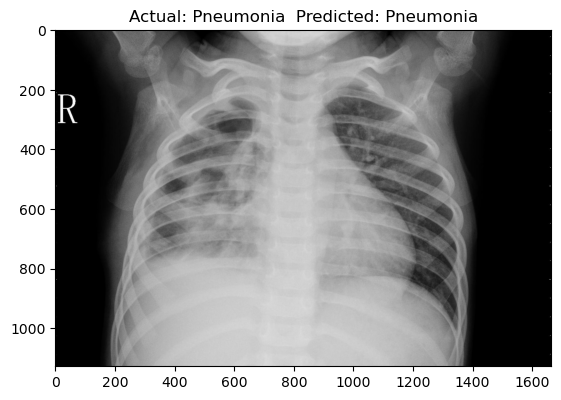

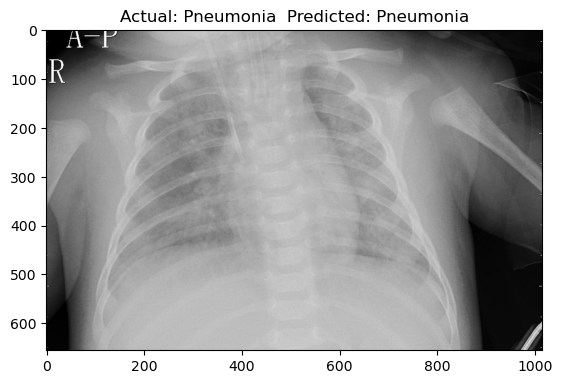

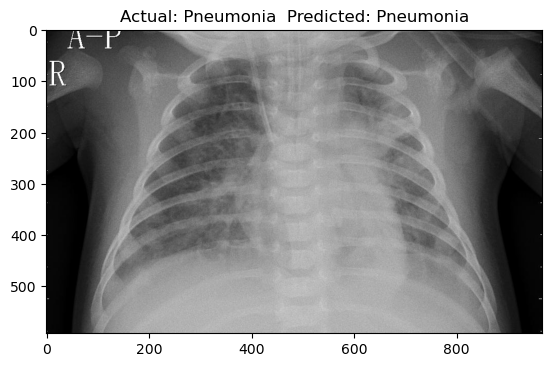

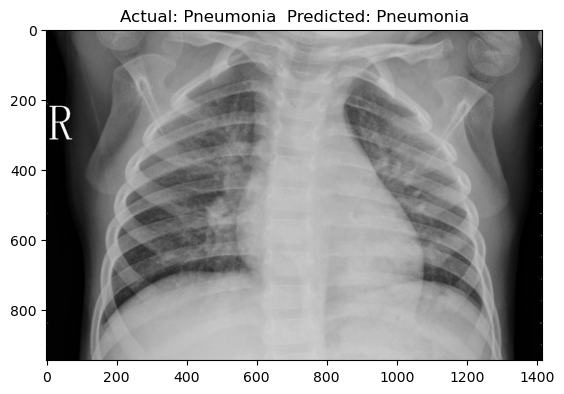

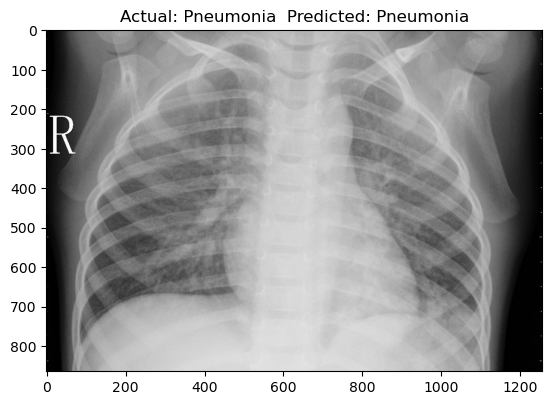

In [116]:
d = {1: 'Pneumonia', 0: 'Normal'}

for i in range(len(df_val)):
    img = cv2.imread(df_val.iloc[i,0])
    plt.imshow(img)
    plt.title('Actual: '+d[val_result[i]] + '  ' + 'Predicted: '+d[final_val[i][0]])
    plt.show()